In [1]:


model_color = {"scBert": "#4974a4", "scGPT": "#8acc72", "Geneformer": "#b81316", "Scfoundation": "#f29600"}

import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel('../plots/figs_data.xlsx', sheet_name='fig1')
df

,model,cell_num,params,gene_vocab,gene_emb,cell_emb,max_seq_len
0,scBert,1.12658,839,16906,200,200,16906
1,Geneformer,30.00000,1029,25426,256,256,2048
2,scGPT,33.00000,5133,60697,512,512,1200
3,Scfoundation,50.00000,11925,19264,768,768,19264


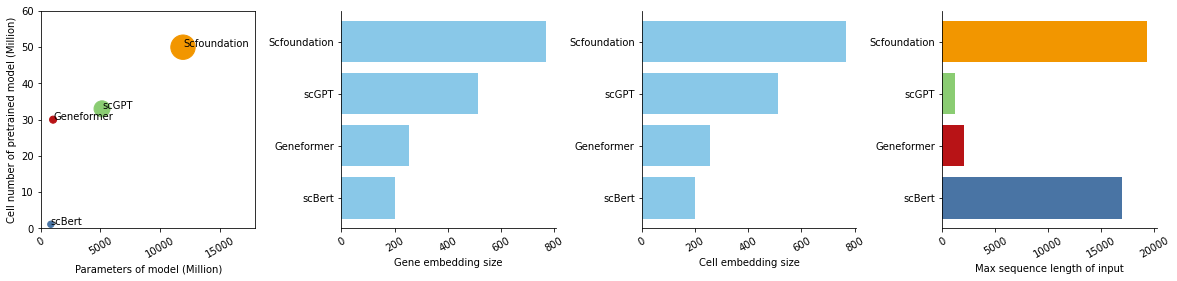

In [3]:
# "#a4cde1","#67a4cc","#277fb8","#549da3","#96cb8f","#8bc96d","#4dae47","#5c9e43","#b79973","#f38989","#ec5051","#e32427","#ef6a45","#f9b769","#f9a341","#f48521","#ee8e46","#d4a6a8","#af93c4","#8660a8","#815e99","#c6b598","#f6f28f","#d4a55b","#b05a28"
import numpy as np
import os

fig = plt.figure(figsize=(20, 4))
plt.subplots_adjust(wspace=0.4, hspace=0)
axes_1 = plt.subplot(141)
colors = [model_color[i] for i in df['model']]
x = df['params']
y = df['cell_num']
s = [int(i/100)*5 for i in df['params']]
axes_1.scatter(x, y, c=colors, s=s)
for i in range(df.shape[0]):
    plt.annotate(df['model'][i], xy = (x[i], y[i]), xytext=(x[i] + 0.5, y[i]))
plt.xticks(rotation=30)
axes_1.set_xlabel('Parameters of model (Million)')
axes_1.set_ylabel('Cell number of pretrained model (Million)')
plt.xlim(0, 18000)
plt.ylim(0, 60)

axes_2 = plt.subplot(142)
axes_2.barh('model', 'gene_emb', data=df, color="#89c8e8")  # 
plt.xticks(rotation=30)
axes_2.set_xlabel('Gene embedding size')
axes_2.spines['right'].set_visible(False)
axes_2.spines['top'].set_visible(False)

axes_3 = plt.subplot(143)
axes_3.barh('model', 'cell_emb', data=df, color="#89c8e8")
plt.xticks(rotation=30)
axes_3.set_xlabel('Cell embedding size')
axes_3.spines['right'].set_visible(False)
axes_3.spines['top'].set_visible(False)

axes_4 = plt.subplot(144)
axes_4.barh('model', 'max_seq_len', data=df, color=colors)
plt.xticks(rotation=30)
axes_4.set_xlabel('Max sequence length of input')
axes_4.spines['right'].set_visible(False)
axes_4.spines['top'].set_visible(False)
# df.plot.bar(x='model', y='GPU', color="#a4cde1", )
if not os.path.exists('./fig1'):
    os.makedirs('./fig1', exist_ok=True)
plt.savefig('./fig1/fig1.pdf', bbox_inches='tight')